# Calculating simple 
- Pct change
- Log returns
- Standard deviation (Volatility)
- Rolling
    - Simple Moving Avarage
    - Exponential Moving Average

### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400


In [4]:
data['%-chg'] = data['Close'].pct_change()

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,0.028289
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,0.020932
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,-0.001449
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-0.044339


In [6]:
(79.422501 - 77.237503)/77.237503

0.028289340218572226

In [7]:
import numpy as np

In [8]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,NaN,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,0.028289,0.027897
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,0.020932,0.020716
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,-0.001449,-0.001450
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-0.044339,-0.045352


In [13]:
data['Log returns'].std()

0.02976380454385509

In [14]:
volatility = data['Log returns'].std()*252**.5

In [15]:
volatility

0.47248574936504895

In [18]:
str_vol = str(round(volatility, 4)*100)

In [19]:
str_vol

'47.25'

<IPython.core.display.Javascript object>


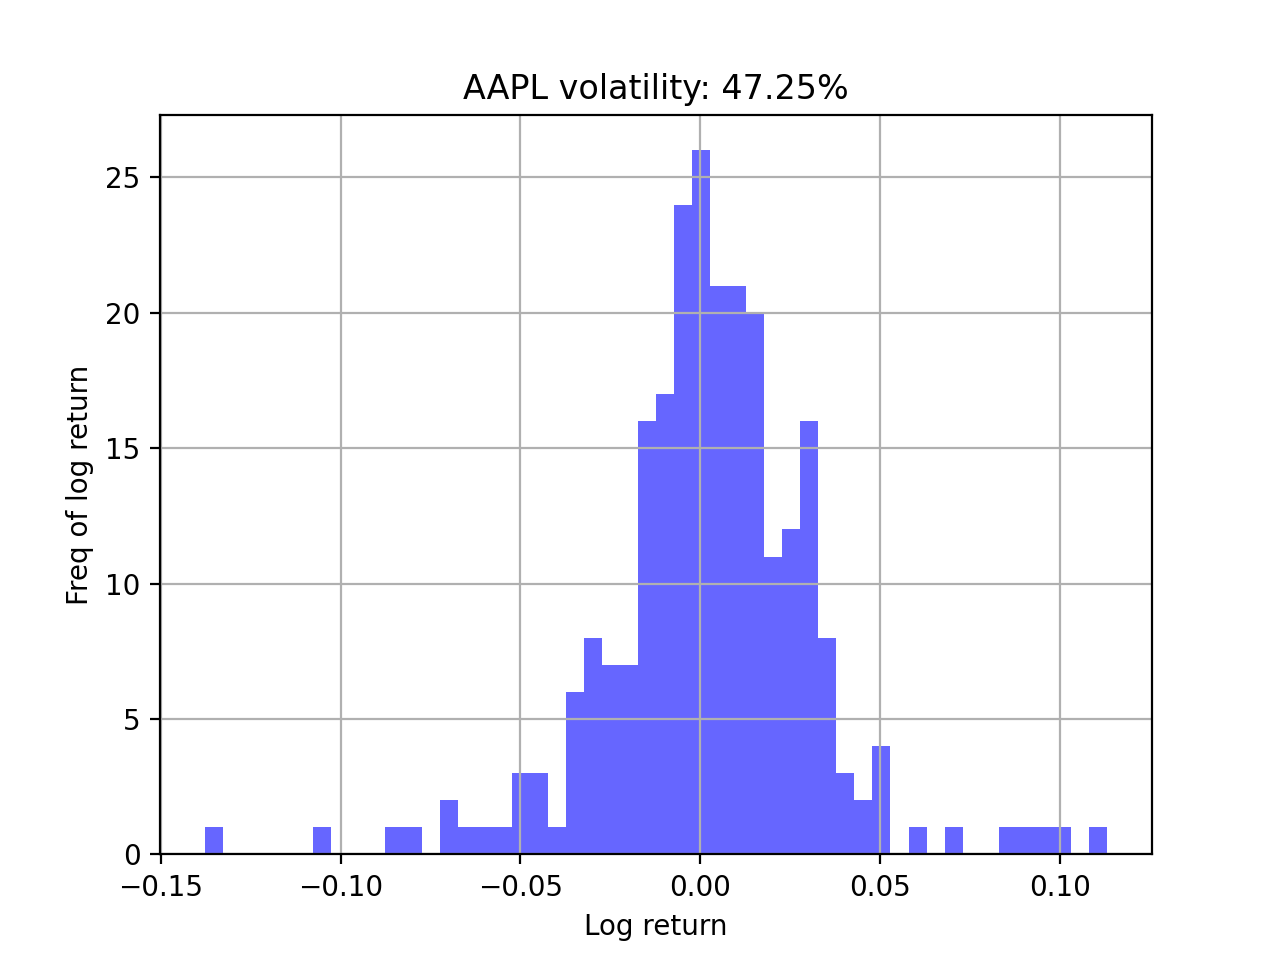

Text(0.5, 1.0, 'AAPL volatility: 47.25%')

In [22]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL volatility: " + str_vol + "%")

In [23]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns
Date,,,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000,NaN,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000,0.028289,0.027897
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200,0.020932,0.020716
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200,-0.001449,-0.001450
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400,-0.044339,-0.045352


In [29]:
data['MA10'] = data['Close'].rolling(10).mean()

In [31]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10
Date,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,132.029999,104319500,0.032856,0.032328,129.415000
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.869995,120529500,0.036658,0.036002,130.442000
2021-01-22,136.279999,139.850006,135.020004,139.070007,139.070007,114459400,0.016074,0.015946,131.257001
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157282400,0.027684,0.027308,132.344000
2021-01-26,143.600006,144.300003,141.369995,142.080002,142.080002,50388565,-0.005877,-0.005895,133.654001


In [34]:
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [35]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,132.029999,104319500,0.032856,0.032328,129.415000,129.703820
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.869995,120529500,0.036658,0.036002,130.442000,131.006761
2021-01-22,136.279999,139.850006,135.020004,139.070007,139.070007,114459400,0.016074,0.015946,131.257001,132.472806
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157282400,0.027684,0.027308,132.344000,134.372295
2021-01-26,143.600006,144.300003,141.369995,142.080002,142.080002,50388565,-0.005877,-0.005895,133.654001,135.773696


<IPython.core.display.Javascript object>


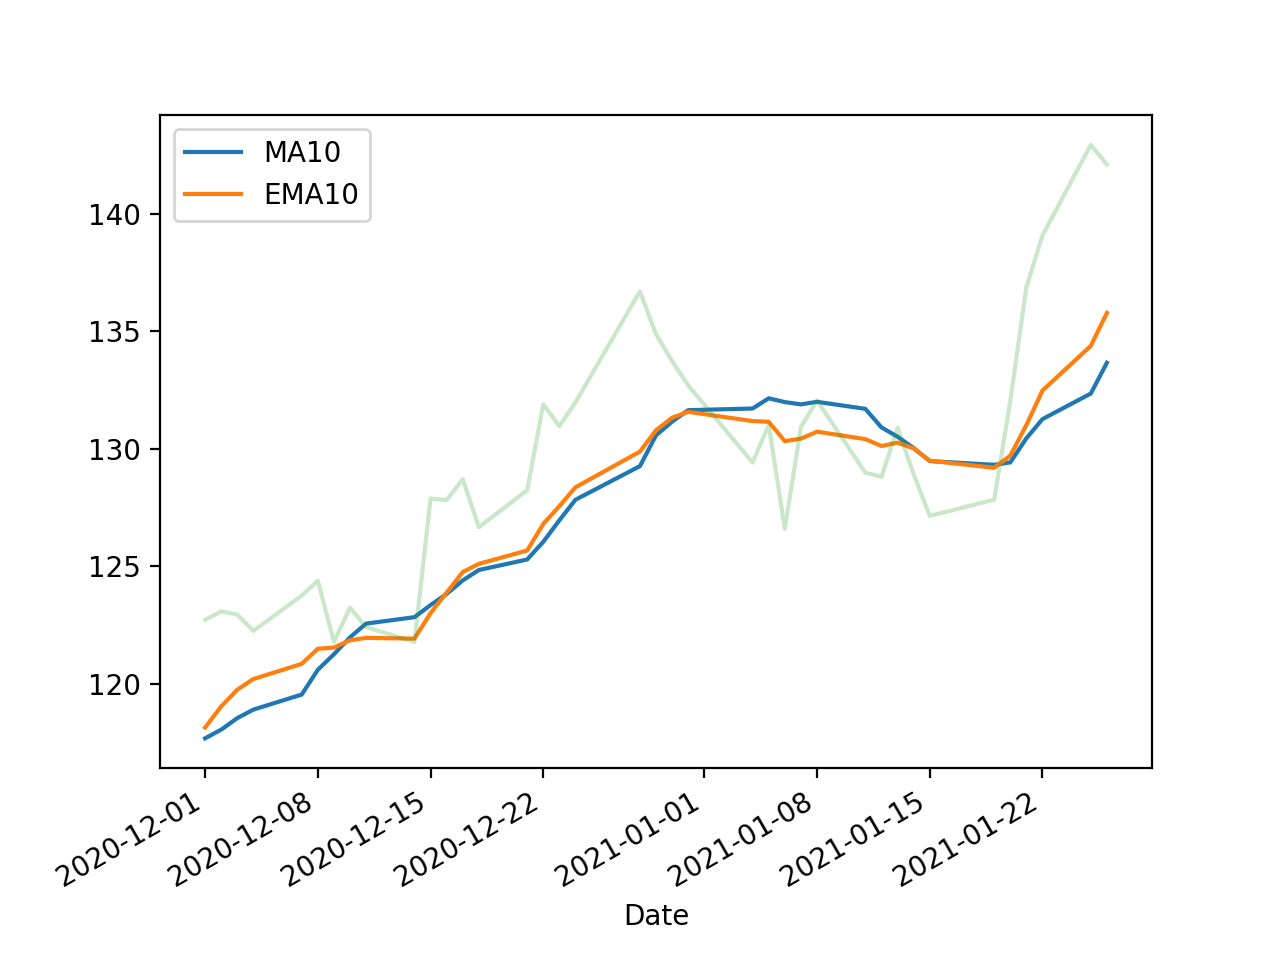

<AxesSubplot:xlabel='Date'>

In [40]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2020-12-01':].plot(ax=ax)
data['Close'].loc['2020-12-01':].plot(ax=ax, alpha=0.25)